In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [2]:
Doctor_data=pd.read_excel('Final_Train.xlsx')

## EDA

In [3]:
Doctor_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
Doctor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Obs: Dataset has 7 attributes. Fees attribute is int type and rest all are object type

In [5]:
Doctor_data.shape

(5961, 7)

Obs: Dataset has 5961 rows and 7 columns

#### Checking for null values:

In [6]:
Doctor_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Obs:  Rating attribute has 3302  , Misc. info has 2620  and Place has 25 null values

Dropping Miscellaneous_Info attributes since these contains approx 50%  Null values

In [7]:
doctor_data=Doctor_data.drop(['Miscellaneous_Info'],axis=1)

### Data cleaning

#### Removing String 'years experience' from attribute Experience and converting it to int type

In [8]:
doctor_data['Experience'].replace(regex=['years experience'],value="",inplace=True)
doctor_data['Experience']=doctor_data['Experience'].astype('str').astype('int')

In [9]:
doctor_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250


#### Removing '%' symbol from Rating and fill nan values with '0' and converting attribute to int type

In [10]:
doctor_data['Rating'].replace(regex=['%'],value="",inplace=True)
doctor_data['Rating']=doctor_data['Rating'].fillna('0')
doctor_data['Rating']=doctor_data['Rating'].astype('int')

#### Finding mean values of Rating for each Profile type

In [11]:
doctor_data.groupby('Profile').mean()['Rating']

Profile
Ayurveda            22.795165
Dentist             61.617037
Dermatologists      57.695358
ENT Specialist      37.296703
General Medicine    30.452685
Homeopath           29.811388
Name: Rating, dtype: float64

#### Replacing '0' ratings with their respective means:

In [12]:
for i in range(5960):
    if(doctor_data.iloc[i,2]==0):
        if(doctor_data.iloc[i,4]=='Ayurveda'):
                doctor_data.iloc[i,2]=23
        if(doctor_data.iloc[i,4]=='Dentist'):
                doctor_data.iloc[i,2]=61
        if(doctor_data.iloc[i,4]=='Dermatologists'):
                doctor_data.iloc[i,2]=58
        if(doctor_data.iloc[i,4]=='ENT Specialist'):
                doctor_data.iloc[i,2]=37
        if(doctor_data.iloc[i,4]=='General Medicine'):
                doctor_data.iloc[i,2]=30
        if(doctor_data.iloc[i,4]=='Homeopath'):
                doctor_data.iloc[i,2]=30
            

#### converting Rating on a scale of 0 to 10

In [13]:
doctor_data['Rating']=doctor_data['Rating']/10
doctor_data['Rating']=doctor_data['Rating'].round()
doctor_data['Rating']=doctor_data['Rating'].astype('int')

In [14]:
doctor_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,10,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,10,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,4,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,2,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,10,"Keelkattalai, Chennai",Ayurveda,250


In [15]:
doctor_data['Rating'].value_counts()

10    1872
3     1368
6      937
2      600
9      534
4      427
8      167
7       52
5        3
1        1
Name: Rating, dtype: int64

#### Separating city name from place attribute so that our model can perform better

In [16]:
doctor_data['Place']=doctor_data['Place'].str.split(',')
doctor_data['city']=doctor_data['Place'].str[1]
doctor_data['Place']=doctor_data['Place'].str[0]

In [17]:
doctor_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees,city
0,"BHMS, MD - Homeopathy",24,10,Kakkanad,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Whitefield,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,4,Mathikere - BEL,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,2,Bannerghatta Road,Ayurveda,250,Bangalore
4,BAMS,20,10,Keelkattalai,Ayurveda,250,Chennai


In [18]:
doctor_data.isnull().sum()

Qualification     0
Experience        0
Rating            0
Place            25
Profile           0
Fees              0
city             26
dtype: int64

#### Fixing NAN values of City attribute since we will use city attribute for our model building

In [19]:
doctor_data['city'].mode()

0     Bangalore
dtype: object

In [20]:
#Fixing Null values for city Attribute
doctor_data['city'].fillna('Bangalore',inplace=True)
doctor_data['city']=doctor_data['city'].str.strip()
doctor_data['city'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'Sector 5'],
      dtype=object)

In [21]:
doctor_data['qualification-']=''

#### Transforming Qualification attribute in a simple form by importance to the bachelor's degree of each doctor

In [22]:
import re
col=['MBBS','BAMS','BHMS','DHMS','BDS','BEMS','MDS','DAM','FWFO','FICD','BSc','DLO','DNB','MD - Dermatology','MD - Physician',
     'MD - Medicine','MD - Homeopathy','MD - Ayurveda Medicine','MS - Ayurveda','MS - Otorhinolaryngology']
for i in range(5961):
    k=doctor_data.iloc[i,0]
    for j in col:
        if(re.search(j,k)):
            doctor_data.iloc[i,-1]=j
            break
    if(doctor_data.iloc[i,-1]==''):
        doctor_data.iloc[i,-1]=k
doctor_data['qualification-']=doctor_data['qualification-'].str.strip()

In [23]:
doctor_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees,city,qualification-
0,"BHMS, MD - Homeopathy",24,10,Kakkanad,Homeopath,100,Ernakulam,BHMS
1,"BAMS, MD - Ayurveda Medicine",12,10,Whitefield,Ayurveda,350,Bangalore,BAMS
2,"MBBS, MS - Otorhinolaryngology",9,4,Mathikere - BEL,ENT Specialist,300,Bangalore,MBBS
3,"BSc - Zoology, BAMS",12,2,Bannerghatta Road,Ayurveda,250,Bangalore,BAMS
4,BAMS,20,10,Keelkattalai,Ayurveda,250,Chennai,BAMS


In [24]:
print(doctor_data['qualification-'].unique())

['BHMS' 'BAMS' 'MBBS' 'BDS' 'DHMS' 'MD - Dermatology'
 'Get inspired by remarkable stories of people like you'
 'PhD - Orthodontics & Dentofacial Orthopaedics, MOrth' 'DLO' 'MDS'
 'MD - Ayurveda Medicine' 'GCEH' 'MS - Otorhinolaryngology' 'BSAM'
 'MD - Skin & VD' '39 years experience' 'LCEH'
 'Doctor of Homeopathic Medicine (HMD)' 'MS - ENT'
 'GCEH, Certificate in Child Health (CCH)' 'MD - Homeopathy'
 'MD - General Medicine' 'MD - Physician' 'BSAM, BNYS'
 'Diploma in Dermatology' 'G.A.M.S' 'DNB'
 'Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology'
 'Post Graduate Diploma in Diabetology (PGDD), MD - Diabetology' 'BEMS'
 'MD - Medicine' 'M.D. (E.H)' 'DDVL' 'MS - Ayurveda' 'BIMS' '

In [25]:
doctor_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees,city,qualification-
0,"BHMS, MD - Homeopathy",24,10,Kakkanad,Homeopath,100,Ernakulam,BHMS
1,"BAMS, MD - Ayurveda Medicine",12,10,Whitefield,Ayurveda,350,Bangalore,BAMS
2,"MBBS, MS - Otorhinolaryngology",9,4,Mathikere - BEL,ENT Specialist,300,Bangalore,MBBS
3,"BSc - Zoology, BAMS",12,2,Bannerghatta Road,Ayurveda,250,Bangalore,BAMS
4,BAMS,20,10,Keelkattalai,Ayurveda,250,Chennai,BAMS


#### Rearranging columns:

In [26]:
doctor_data=doctor_data[['Qualification','qualification-','Experience','Rating','Place','city','Profile','Fees']]

In [27]:
doctor_data['Place'].mode()

0    HSR Layout
dtype: object

In [28]:
doctor_data['Place'].fillna('HSR Layout',inplace=True)

In [29]:
doctor_data.isnull().sum()

Qualification     0
qualification-    0
Experience        0
Rating            0
Place             0
city              0
Profile           0
Fees              0
dtype: int64

#### Observation: Null values removed from dataset

#### Stats Summary

In [30]:
doctor_data.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,6.353967,307.944640
std,11.142798,3.129721,190.920373
min,0.000000,1.000000,5.000000
25%,9.000000,3.000000,150.000000
50%,14.000000,6.000000,300.000000
75%,23.000000,10.000000,500.000000
max,66.000000,10.000000,950.000000


Obs: Target attribute has a wide range of 945

Experience range is from 0 to 66

Approx 80% Fees values lies within 1 std from mean 

Doctors Fees ranges from 0 to 950

Approx 80% of rating values lies within 1 std of mean 

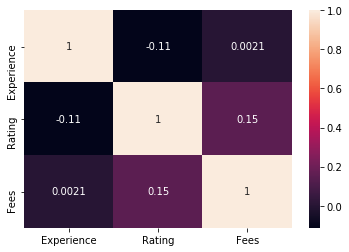

In [32]:
import seaborn as sb
sb.heatmap(doctor_data.corr(),annot=True)

Obs:  Rating and Experience are very less correlated with Fees.

Rating and Experience are negatively correlated with each other

In [33]:
doctor_data.head()

,Qualification,qualification-,Experience,Rating,Place,city,Profile,Fees
0,"BHMS, MD - Homeopathy",BHMS,24,10,Kakkanad,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",BAMS,12,10,Whitefield,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",MBBS,9,4,Mathikere - BEL,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",BAMS,12,2,Bannerghatta Road,Bangalore,Ayurveda,250
4,BAMS,BAMS,20,10,Keelkattalai,Chennai,Ayurveda,250


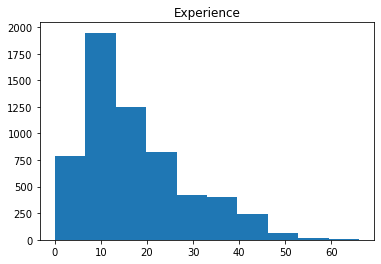

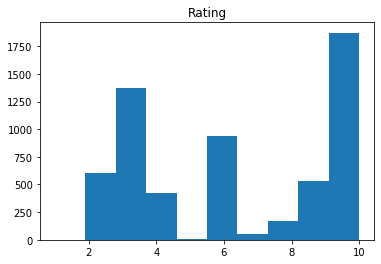

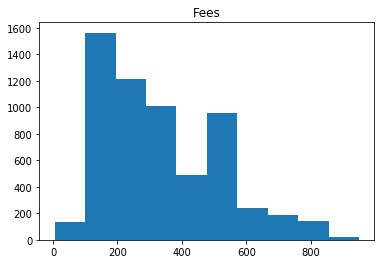

In [34]:
# checking the distribution of data

for i in ['Experience','Rating','Fees']:
    plt.subplots()
    plt.hist(x=doctor_data[i])
    plt.title(i)

Most of the values in Fees lie within 100 to 200 

Most Doctors are with 9 to 15 years experience

Mostly Doctors are having rating between 9 to 10 followed by 3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text xticklabel objects>)

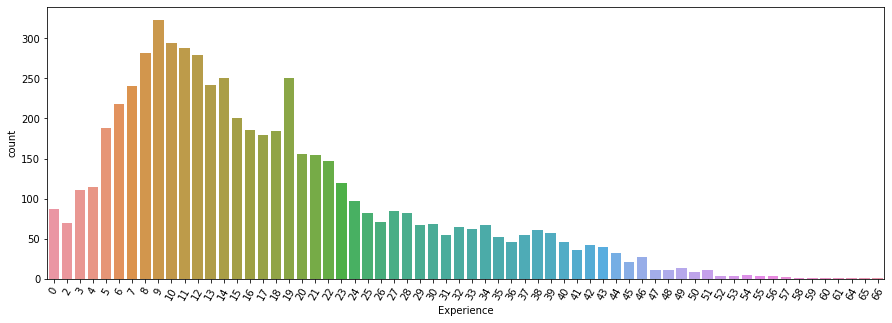

In [35]:
#checking the count of Experiences
plt.figure(figsize=(15,5))
sb.countplot(x='Experience',data=doctor_data)
plt.xticks(rotation=60)

Obs: Maximum doctors are of 9 years experience

Majority of years expereinces lies between 5 to 19 years

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

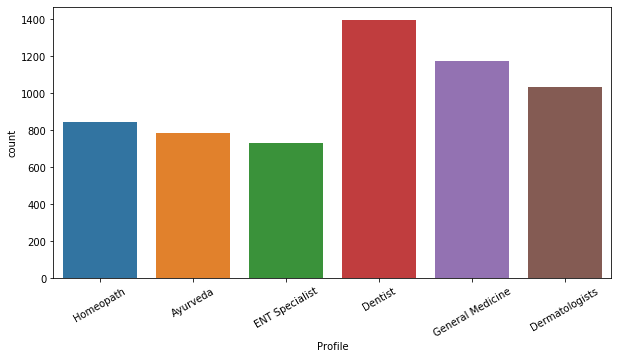

In [36]:
#checking the count of Doctor's Profiles
plt.figure(figsize=(10,5))
sb.countplot(x='Profile',data=doctor_data)
plt.xticks(rotation=30)

Obs: Maximum doctors are of Dentist Profile

ENT specialist's are the least in number

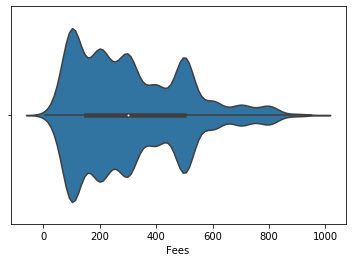

In [37]:
sb.violinplot(doctor_data['Fees'])

Obs: There are very few doctors taking fees greater than 600

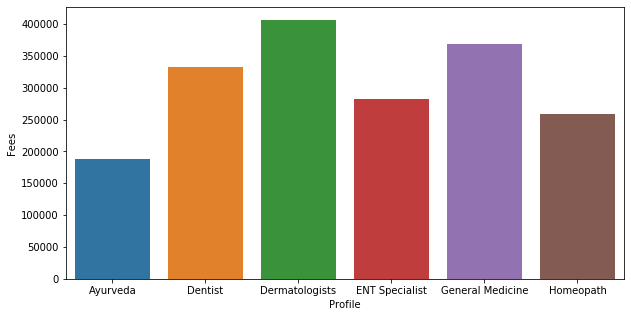

In [38]:
#checking average Fees taken vs profile
plt.figure(figsize=(10,5))
df=doctor_data.groupby('Profile').sum()
sb.barplot(y='Fees',x=df.index,data=df)

Obs: Dermatologists are taking maximum average Fees followed by Dentist

Least average Fees taken by Ayurveda

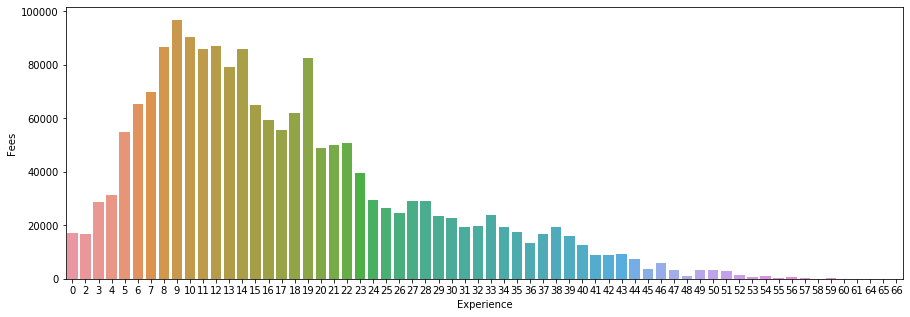

In [39]:
#checking average Fees taken vs Experience
plt.figure(figsize=(15,5))
df=doctor_data.groupby('Experience').sum()
sb.barplot(y='Fees',x=df.index,data=df)

Obs: Doctors of 9 and 10 years experience are taking maximum average Fees

In [40]:
doctor_data.head()

,Qualification,qualification-,Experience,Rating,Place,city,Profile,Fees
0,"BHMS, MD - Homeopathy",BHMS,24,10,Kakkanad,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",BAMS,12,10,Whitefield,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",MBBS,9,4,Mathikere - BEL,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",BAMS,12,2,Bannerghatta Road,Bangalore,Ayurveda,250
4,BAMS,BAMS,20,10,Keelkattalai,Chennai,Ayurveda,250


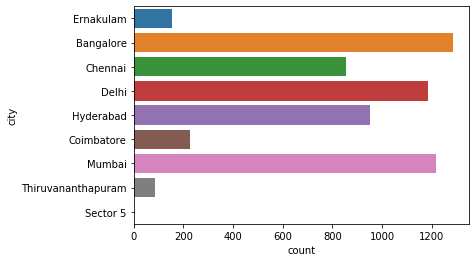

In [41]:
#taking doctor availlbility by count of city
sb.countplot(y='city',data=doctor_data)

Maximum doctors are present at Bangalore followed by Mumbai

In [42]:
#Checking which Qualification is taking maximum Fees
doctor_data.sort_values('Fees',ascending=False)[['qualification-','Fees']].head(1)

,qualification-,Fees
293,MBBS,950


Obs: MBBS Doctors are taking maximum Fees of 950

In [43]:
#Checking which Place is having maximum Fees
doctor_data.sort_values('Fees',ascending=False)[['Place','Fees']].head(1)


,Place,Fees
293,Adyar,950


Doctor's in Adyar are taking maximum Fees

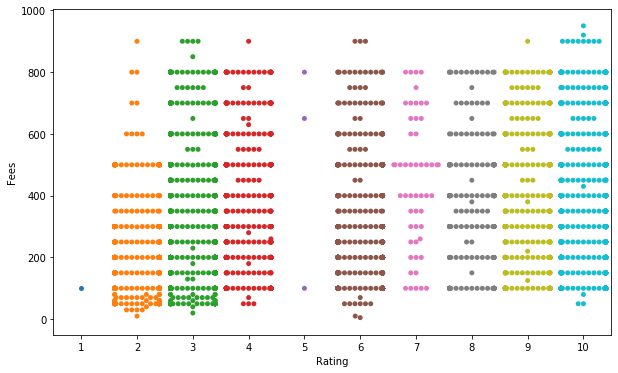

In [44]:
#Viewing Rating vs Fees taken
plt.figure(figsize=(10,6))
sb.swarmplot(x='Rating',y='Fees',data=doctor_data)

Obs: There are very few doctors with 1 and 5 Rating 

Doctors with rating 10 are taking almost all category fees

In [45]:
# viewing average fees with respect to place
df__=doctor_data.groupby('city').mean()
df__.sort_values('Fees',ascending=False).head(1)

,Experience,Rating,Fees
city,,,
Delhi,18.646959,6.423986,363.006757


Delhi is having maximum average fees of 363

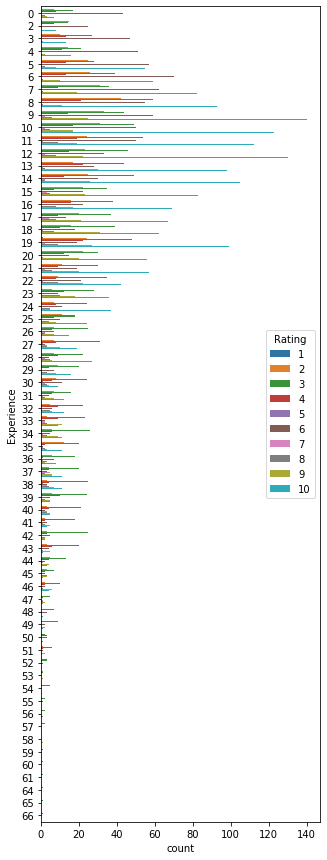

In [46]:
plt.figure(figsize=(5,15))
sb.countplot(hue='Rating',y='Experience',data=doctor_data)

Doctors with Rating 10 are available in almost all the Experience range

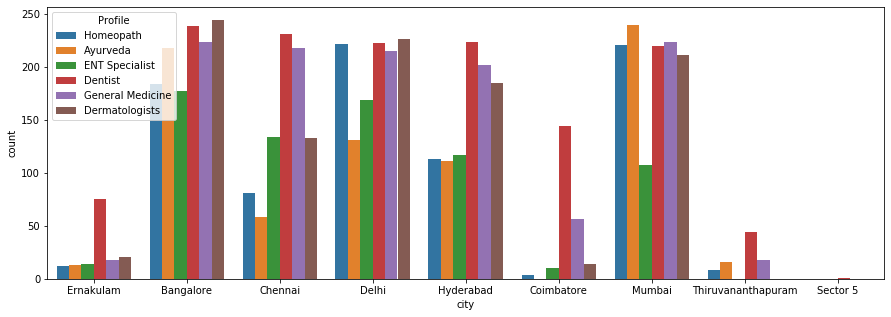

In [47]:
plt.figure(figsize=(15,5))
sb.countplot(x='city',hue='Profile',data=doctor_data)

Bangalore is having highest number Dentist,General Medicine and Ayurveda Docotrs

Mumbai is having most number of Ayurveda Doctors and Homeopath

Delhi is having most number of Dermatologists

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

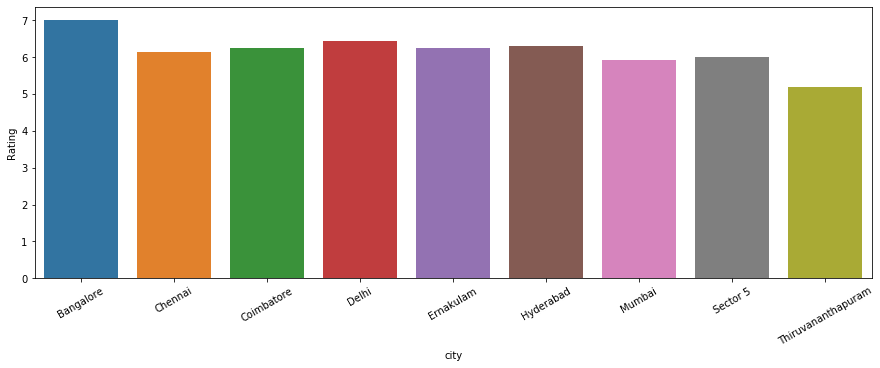

In [48]:
#checking average rating per city
plt.figure(figsize=(15,5))
rat=doctor_data.groupby('city').mean()
sb.barplot(y='Rating',x=rat.index,data=rat)
plt.xticks(rotation=30)

Obs: bangalore is having highest average rating

In [49]:
doctor_data.head()

,Qualification,qualification-,Experience,Rating,Place,city,Profile,Fees
0,"BHMS, MD - Homeopathy",BHMS,24,10,Kakkanad,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",BAMS,12,10,Whitefield,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",MBBS,9,4,Mathikere - BEL,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",BAMS,12,2,Bannerghatta Road,Bangalore,Ayurveda,250
4,BAMS,BAMS,20,10,Keelkattalai,Chennai,Ayurveda,250


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

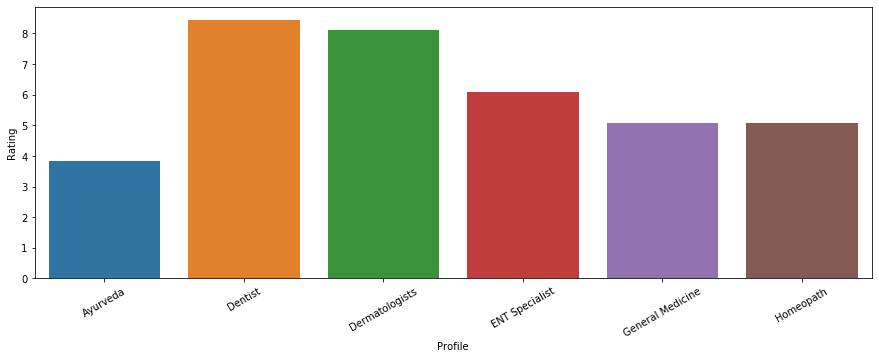

In [50]:
#checking average rating per Profile
plt.figure(figsize=(15,5))
rat=doctor_data.groupby('Profile').mean()
sb.barplot(y='Rating',x=rat.index,data=rat)
plt.xticks(rotation=30)

Obs: Dentist's are having highest average rating

#### Label Encoding the string columns which will be used in Model preparation:

In [51]:
from sklearn.preprocessing import LabelEncoder
qualification_copy=pd.DataFrame()
qualification_copy['qualification']=doctor_data['qualification-']
le=[]
for k,i in zip(range(3),['qualification-','city','Profile']):
    le.append(LabelEncoder())
    le[k].fit(doctor_data[i])
    doctor_data[i]=le[k].transform(doctor_data[i])

In [52]:
doctor_data.head()

,Qualification,qualification-,Experience,Rating,Place,city,Profile,Fees
0,"BHMS, MD - Homeopathy",4,24,10,Kakkanad,4,5,100
1,"BAMS, MD - Ayurveda Medicine",1,12,10,Whitefield,0,0,350
2,"MBBS, MS - Otorhinolaryngology",24,9,4,Mathikere - BEL,0,3,300
3,"BSc - Zoology, BAMS",1,12,2,Bannerghatta Road,0,0,250
4,BAMS,1,20,10,Keelkattalai,1,0,250


In [53]:
from scipy.stats import zscore
gf=doctor_data.iloc[:,[1,2,3,5,6,7]]
z=abs(zscore(gf))
doc_data_no_outliers=gf[(z<3).all(axis=1)]
print(doctor_data.shape)
print(doc_data_no_outliers.shape)
print(doctor_data.shape[0]-doc_data_no_outliers.shape[0], 'rows removed as outliers')

(5961, 8)
(5903, 6)
58 rows removed as outliers


#### Checking the skewness:

In [54]:
doc_data_no_outliers.skew()

qualification-    0.004860
Experience        0.897661
Rating           -0.037540
city              0.052925
Profile           0.121336
Fees              0.710445
dtype: float64

#### Handling skewness using log and square root transformation

In [55]:
doc_data_no_outliers['Experience']=np.sqrt(doc_data_no_outliers['Experience'])
doc_data_no_outliers['Fees']=np.log(doc_data_no_outliers['Fees'])
doc_data_no_outliers.skew()

qualification-    0.004860
Experience        0.023642
Rating           -0.037540
city              0.052925
Profile           0.121336
Fees             -0.324244
dtype: float64

Skewness removed from Dataset

In [56]:
doc_data_no_outliers.head()

,qualification-,Experience,Rating,city,Profile,Fees
0,4,4.898979,10,4,5,4.605170
1,1,3.464102,10,0,0,5.857933
2,24,3.000000,4,0,3,5.703782
3,1,3.464102,2,0,0,5.521461
4,1,4.472136,10,1,0,5.521461


In [57]:
x=doc_data_no_outliers.iloc[:,0:-1]
y=doc_data_no_outliers.iloc[:,-1]

In [58]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
mm=MinMaxScaler()
ss.fit(x)
x_ss=ss.transform(x)
mm.fit(x)
x_mm=mm.transform(x)

In [59]:
pd.DataFrame(x_ss).skew()

0    0.004860
1    0.023642
2   -0.037540
3    0.052925
4    0.121336
dtype: float64

In [60]:
pd.DataFrame(x_mm).skew()

0    0.004860
1    0.023642
2   -0.037540
3    0.052925
4    0.121336
dtype: float64

In [61]:
#importing libraries for model
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

In [62]:
# preparing a method to get metric at best random state
def max_r2_score(x,y,test_size,model):
    max=0
    ind=0
    for i in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < r2_score(test_y,pred)):
                max=r2_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    #print('max r2_score :',r2_score(test_y,pred),'at random state',ind)
    list_r2score.append(r2_score(test_y,pred))
    list_MSE.append(mean_squared_error(test_y,pred))
    list_MAE.append(mean_absolute_error(test_y,pred))
    list_RMSE.append(np.sqrt(mean_squared_error(test_y,pred)))
    list_MSLE.append(abs(mean_squared_log_error(test_y,pred)))
    score=cross_val_score(model,x,y,cv=5,scoring='r2')
    #print('cross val score :',score,score.mean(),' standard deviation',score.std())
    cross_val_r2Score.append(score.mean())

In [63]:
list_r2score=[]
list_MSE=[]
list_MAE=[]
list_RMSE=[]
list_MSLE=[]
cross_val_r2Score=[]
model_list=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(alpha=0.1),
            Ridge(alpha=0.1),ElasticNet(),SVR()]
for i,k in zip(model_list,['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']):
    #print('**********************************',k,'****************************************')
    max_r2_score(x_mm,y,0.25,i)
    #print('\n')

In [64]:
col=['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']
performance_df=pd.DataFrame([list_r2score,cross_val_r2Score,list_MSE,list_RMSE,list_MAE,list_MSLE],index=['R2','cross_val_r2Score','MSE','RMSE','MAE','MS_log_error'],columns=col)
performance_df

,LinearRegression,DecisionTree,KNN,Lasso,Ridge,ElasticNet,SVR
R2,0.124191,-0.302596,0.121203,-0.002731,0.124182,-0.002731,0.196843
cross_val_r2Score,0.095032,-0.256627,0.057983,-0.001054,0.095033,-0.001054,0.125062
MSE,0.440145,0.601765,0.432106,0.463235,0.440149,0.463235,0.400323
RMSE,0.663434,0.775735,0.657348,0.680614,0.663437,0.680614,0.632711
MAE,0.548301,0.582946,0.520695,0.579955,0.548306,0.579955,0.508094
MS_log_error,0.011438,0.014917,0.010804,0.011582,0.011438,0.011582,0.010028


### Here r2-Score is low for all the models hence we will prefer other metrices for our model evaluation like MSE,MSE,RMSE and MS_log_error

#### Till now we can see that SVR is working best in all the metrices except r2 score.Hence we will choose SVR till now

#### Tyring Hyperparameter tuning for SVR to check if that improve the score.

In [65]:
# making a method to perform hyper tuning using MSE as the scoring metric
from sklearn.metrics import make_scorer
def gridsearch(x,y,model,parameter_dictionary):
    #kfold=model_selection.KFold(n_splits=10,random_state=rs,shuffle=True)
        grid_cv=GridSearchCV(estimator=model,param_grid=parameter_dictionary,cv=5,scoring='neg_mean_squared_error')
        grid_cv.fit(x,y)
        print('\n')   
        print('best mean score(MSE) :',abs(grid_cv.best_score_))
       
        print('best Parameter :',grid_cv.best_params_)
       

In [66]:
gridsearch(x_mm,y,SVR(),{'C':[0.1,1,10],'kernel':["linear","rbf","poly"]})



best mean score(MSE) : 0.4035828646413041
best Parameter : {'C': 0.1, 'kernel': 'rbf'}


Obs: Best parameters for SVR are C=0.1 and kernel='rbf'

Now checking metrices of SVR at using best parameters:

In [67]:
max_r2_score(x_mm,y,0.25,SVR(C=0.1,kernel='rbf'))

In [68]:
col.append('SVR_hypertuned')
performance_df=pd.DataFrame([list_r2score,cross_val_r2Score,list_MSE,list_RMSE,list_MAE,list_MSLE],index=['R2','cross_val_r2Score','MSE','RMSE','MAE','MS_log_error'],columns=col)
performance_df

,LinearRegression,DecisionTree,KNN,Lasso,Ridge,ElasticNet,SVR,SVR_hypertuned
R2,0.124191,-0.302596,0.121203,-0.002731,0.124182,-0.002731,0.196843,0.194064
cross_val_r2Score,0.095032,-0.256627,0.057983,-0.001054,0.095033,-0.001054,0.125062,0.131029
MSE,0.440145,0.601765,0.432106,0.463235,0.440149,0.463235,0.400323,0.401708
RMSE,0.663434,0.775735,0.657348,0.680614,0.663437,0.680614,0.632711,0.633804
MAE,0.548301,0.582946,0.520695,0.579955,0.548306,0.579955,0.508094,0.515491
MS_log_error,0.011438,0.014917,0.010804,0.011582,0.011438,0.011582,0.010028,0.010084


Obs: Hypertuning is not improving the score

#### Trying ensemble techniques:

In [69]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
max_r2_score(x_mm,y,0.25,GradientBoostingRegressor())
col.append('GBR')

In [70]:
max_r2_score(x_mm,y,0.25,RandomForestRegressor())
col.append('RFR')

In [71]:
max_r2_score(x_mm,y,0.25,AdaBoostRegressor())
col.append('ADR')

In [72]:
max_r2_score(x_mm,y,0.25,BaggingRegressor())
col.append('BR')

In [73]:
max_r2_score(x_mm,y,0.25,ExtraTreesRegressor())
col.append('ETR')

#### Performance Summary for all ensemble techniques:

In [74]:
performance_df=pd.DataFrame([list_r2score,cross_val_r2Score,list_MSE,list_RMSE,list_MAE,list_MSLE],index=['R2','cross_val_r2Score','MSE','RMSE','MAE','MS_log_error'],columns=col)
performance_df

,LinearRegression,DecisionTree,KNN,Lasso,Ridge,ElasticNet,SVR,SVR_hypertuned,GBR,RFR,ADR,BR,ETR
R2,0.124191,-0.302596,0.121203,-0.002731,0.124182,-0.002731,0.196843,0.194064,0.224587,0.071191,0.134967,0.024896,-0.158475
cross_val_r2Score,0.095032,-0.256627,0.057983,-0.001054,0.095033,-0.001054,0.125062,0.131029,0.195072,-0.003659,0.082435,-0.039161,-0.129436
MSE,0.440145,0.601765,0.432106,0.463235,0.440149,0.463235,0.400323,0.401708,0.381272,0.419901,0.434729,0.440830,0.535185
RMSE,0.663434,0.775735,0.657348,0.680614,0.663437,0.680614,0.632711,0.633804,0.617473,0.647998,0.659340,0.663951,0.731563
MAE,0.548301,0.582946,0.520695,0.579955,0.548306,0.579955,0.508094,0.515491,0.500854,0.505229,0.549332,0.515041,0.562697
MS_log_error,0.011438,0.014917,0.010804,0.011582,0.011438,0.011582,0.010028,0.010084,0.009631,0.010312,0.011183,0.010811,0.013252


### Hence we can conclude that GradientBoosting is working best with all metrices except r2 score since all errors are least in GradientBoosting Algorithm

#### Now trying hyperparameter tuning for Gradient Boosting:

In [75]:
gridsearch(x_mm,y,GradientBoostingRegressor(),{'n_estimators':[10,50,100,150]})



best mean score(MSE) : 0.3739320440876411
best Parameter : {'n_estimators': 100}


Obs: Best Parameter is using n_estimators=150

Now checking model performance at best parameters:

In [76]:
max=100
ind=0
model=GradientBoostingRegressor(n_estimators=150)
for i in range(42,100):
    train_x,test_x,train_y,test_y=train_test_split(x_mm,y,test_size=0.25,random_state=i)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    ms=mean_squared_error(test_y,pred)
    if(max > ms):
           max=ms
           ind=i
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=ind)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print("MSE :",mean_squared_error(test_y,pred))
print("RMSE :",np.sqrt(mean_squared_error(test_y,pred)))
print("MAE :",mean_absolute_error(test_y,pred))
print("MSLE :",mean_squared_log_error(test_y,pred))

MSE : 0.34660387552848004
RMSE : 0.5887307326176204
MAE : 0.4742491393659878
MSLE : 0.008551133891193474


### Hence we can see that all metrices score has been improved.Hence finalizing the model

In [77]:
from sklearn.externals import joblib
joblib.dump(model,'doctor_fees_predictor_model.obj')

['doctor_fees_predictor_model.obj']

### Importing Test data file:

In [143]:
Doctor_data_test=pd.read_excel('Final_test.xlsx')

In [144]:
Doctor_data_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [145]:
Doctor_data_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Obs: rating has null values

In [146]:
Doctor_data_test['Place'].mode()

0    Andheri West, Mumbai
1     Mulund West, Mumbai
dtype: object

### Doing all preprocessing for test data file same as the train data

In [147]:
import re
Doctor_data_test.drop(['Miscellaneous_Info'],axis=1,inplace=True)
Doctor_data_test['Experience'].replace(regex=['years experience'],value="",inplace=True)
Doctor_data_test['Experience']=Doctor_data_test['Experience'].astype('str').astype('int')
Doctor_data_test['Rating'].replace(regex=['%'],value="",inplace=True)
Doctor_data_test['Rating']=Doctor_data_test['Rating'].fillna('0')
Doctor_data_test['Rating']=Doctor_data_test['Rating'].astype('int')
for i in range(1987):
    if(Doctor_data_test.iloc[i,2]==0):
        if(Doctor_data_test.iloc[i,4]=='Ayurveda'):
                Doctor_data_test.iloc[i,2]=23
        if(Doctor_data_test.iloc[i,4]=='Dentist'):
                Doctor_data_test.iloc[i,2]=61
        if(Doctor_data_test.iloc[i,4]=='Dermatologists'):
                Doctor_data_test.iloc[i,2]=58
        if(Doctor_data_test.iloc[i,4]=='ENT Specialist'):
                Doctor_data_test.iloc[i,2]=37
        if(Doctor_data_test.iloc[i,4]=='General Medicine'):
                Doctor_data_test.iloc[i,2]=30
        if(Doctor_data_test.iloc[i,4]=='Homeopath'):
                Doctor_data_test.iloc[i,2]=30
Doctor_data_test['Rating']=Doctor_data_test['Rating']/10
Doctor_data_test['Rating']=Doctor_data_test['Rating'].round()
Doctor_data_test['Rating']=Doctor_data_test['Rating'].astype('int')
Doctor_data_test['Place']=Doctor_data_test['Place'].str.split(',')
Doctor_data_test['city']=Doctor_data_test['Place'].str[1]
Doctor_data_test['Place']=Doctor_data_test['Place'].str[0]
Doctor_data_test['Place'].fillna('Mumbai',inplace=True)
Doctor_data_test['qualification-']=''
col=['MBBS','BAMS','BHMS','DHMS','BDS','BEMS','MDS','DAM','FWFO','FICD','BSc','DLO','DNB','MD - Dermatology','MD - Physician',
     'MD - Medicine','MD - Homeopathy','MD - Ayurveda Medicine','MS - Ayurveda','MS - Otorhinolaryngology']
for i in range(1987):
    k=Doctor_data_test.iloc[i,0]
    for j in col:
        if(re.search(j,k)):
            Doctor_data_test.iloc[i,-1]=j
            break
    if(Doctor_data_test.iloc[i,-1]==''):
        Doctor_data_test.iloc[i,-1]=k
        
Doctor_data_test['qualification-']=Doctor_data_test['qualification-'].str.strip()

In [148]:
Doctor_data_test.isnull().sum()

Qualification     0
Experience        0
Rating            0
Place             0
Profile           0
city              6
qualification-    0
dtype: int64

In [149]:
Doctor_data_test['city'].mode()

0     Bangalore
dtype: object

In [150]:
Doctor_data_test['city'].fillna('Bangalore',inplace=True)

In [151]:
Doctor_data_test=Doctor_data_test[['Qualification','qualification-','Experience','Rating','Place','city','Profile']]

In [152]:
for i in ['qualification-','Place','city','Profile']:
    Doctor_data_test[i]=Doctor_data_test[i].str.strip()

In [153]:
Doctor_data_test.head()

,Qualification,qualification-,Experience,Rating,Place,city,Profile
0,MBBS,MBBS,35,3,Ghatkopar East,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",MBBS,31,4,West Marredpally,Hyderabad,ENT Specialist
2,"MBBS, DDVL",MBBS,40,7,KK Nagar,Chennai,Dermatologists
3,BAMS,BAMS,0,2,New Ashok Nagar,Delhi,Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",BDS,16,10,Kanakpura Road,Bangalore,Dentist


Label encoding the String values which will be used in model:

In [155]:
#del_lab=[37,443,471,791,1159,1573]
#Doctor_data_test.drop(del_lab,axis=0,inplace=True)
Doctor_data_test['qualification-']=le[0].transform(Doctor_data_test['qualification-'])
Doctor_data_test['city']=le[1].transform(Doctor_data_test['city'])
Doctor_data_test['Profile']=le[2].transform(Doctor_data_test['Profile'])

In [156]:
Doctor_data_test['Experience']=np.sqrt(Doctor_data_test['Experience'])

In [157]:
Doctor_data_test.head()

,Qualification,qualification-,Experience,Rating,Place,city,Profile
0,MBBS,24,5.916080,3,Ghatkopar East,6,4
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",24,5.567764,4,West Marredpally,5,3
2,"MBBS, DDVL",24,6.324555,7,KK Nagar,1,2
3,BAMS,1,0.000000,2,New Ashok Nagar,3,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",2,4.000000,10,Kanakpura Road,0,1


In [158]:
x_test=Doctor_data_test.iloc[:,[1,2,3,5,6]]
test_predict=joblib.load('doctor_fees_predictor_model.obj').predict(x_test)

Taking anti log to get actual values since our model was trained on log values of target values

In [159]:
pd.DataFrame(np.e**test_predict).to_csv('doctor_fees_prediction_test_result.csv')